# Filtering the AotM-2011 Dataset

In [1]:
%matplotlib inline
import os, sys, time
import json, gzip, codecs
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data_dir = 'data/aotm-2011'
fuserpl = os.path.join(data_dir, 'aotm2011-user-playlist.pkl')

## Load data

In [3]:
fname = os.path.join(data_dir, 'aotm2011_playlists.json.gz')
reader = codecs.getreader("utf-8")
with gzip.open(fname, 'r') as fd:
    playlists = json.load(reader(fd))

In [4]:
playlists[0]

{'category': 'Mixed Genre',
 'filtered_lists': [['SOFDPDC12A58A7D198'],
  ['SOPIEQP12A8C13F268', 'SOKMCJK12A6D4F6105'],
  ['SOGTGJR12A6310E08D',
   'SOLTBYJ12A6310F2BB',
   'SOBOXXN12A6D4FA1A2',
   'SOUQUFO12B0B80778E']],
 'mix_id': 89567,
 'playlist': [[['peter murphy', "marlene dietrich's favourite poem"], None],
  [['the walker brothers', "the sun ain't gonna shine anymore"],
   'SOFDPDC12A58A7D198'],
  [['marc almond', 'jacky'], None],
  [['tindersticks', 'dying slowly'], None],
  [['tori amos', 'me and a gun'], 'SOPIEQP12A8C13F268'],
  [['suzanne vega', 'luka'], 'SOKMCJK12A6D4F6105'],
  [['madonna', 'spanish eyes'], None],
  [['the angels of light', 'praise your name'], None],
  [['eurythmics', 'sex crime'], None],
  [['tom waits', 'drunk on the moon'], None],
  [['kate bush', 'wuthering heights'], 'SOGTGJR12A6310E08D'],
  [['david bowie', "new york's in love"], 'SOLTBYJ12A6310F2BB'],
  [['echo & the bunnymen', 'crocodiles'], 'SOBOXXN12A6D4FA1A2'],
  [['peter murphy', "i'll fall w

## Filtering data

In [5]:
min_length = 5  # filtering out playlists shorter than this

In [8]:
def filtering(playlists, min_length):
    """
    Extract user information and playlist that has MSD songIDs.
    Filtering out playlists with only 1 song, remove duplicated songs in the same playlist.
    """
    assert len(playlists) > 0
    assert min_length > 0
    results = {}
    for ix in range(len(playlists)):
        if (ix+1) % 1000 == 0:
            sys.stdout.write('\r%d / %d' % (ix+1, len(playlists)))
            sys.stdout.flush()
            
        pl = playlists[ix]['playlist']
        user = playlists[ix]['user']
        member_time = time.strptime(user['member_since'].strip(), '%Y-%m-%dT%H:%M:%S')
        user_name = user['name'].strip()
        key = (time.mktime(member_time), user_name)
        sidlist = [t[1] for t in pl if t[1] is not None]
        sidset = set(sidlist)
        if len(sidset) >= min_length:
            if len(sidlist) != len(set(sidlist)):
                sids = []
                for sid in sidlist:
                    if sid not in sids: 
                        sids.append(sid)
            else:
                sids = sidlist

            try:
                results[key].append(sids)
            except:
                results[key] = [sids]
                
    return results

In [9]:
filtered_dict = filtering(playlists, min_length)

101000 / 101343

## Statistics of filtered playlists

In [10]:
npl_user = [len(filtered_dict[u]) for u in filtered_dict]

In [11]:
print('#user    :', len(filtered_dict))
print('#playlist:', np.sum(npl_user))

#user    : 14182
#playlist: 84710


In [27]:
np.sum(np.array(npl_user) >= 10)

1857

Histogram of #playlist per user.

Average #playlist per user: 6.0


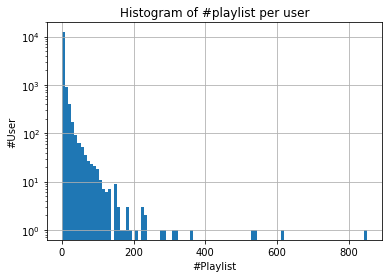

In [15]:
ax = plt.subplot(111)
pd.Series(npl_user).hist(ax=ax, bins=100)
ax.set_title('Histogram of #playlist per user')
ax.set_xlabel('#Playlist')
ax.set_ylabel('#User')
ax.set_yscale('log')
print('Average #playlist per user: %.1f' % np.mean(npl_user))

Histogram of playlist length.

In [13]:
pl_lengths = [len(pl) for u in filtered_dict for pl in filtered_dict[u]]

Average #song per playlist: 10.1


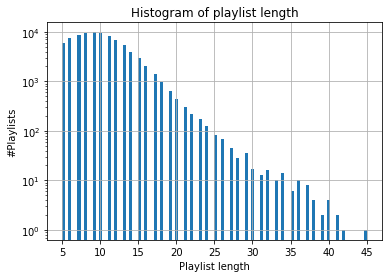

In [16]:
ax = plt.subplot(111)
pd.Series(pl_lengths).hist(ax=ax, bins=100)
ax.set_title('Histogram of playlist length')
ax.set_xlabel('Playlist length')
ax.set_ylabel('#Playlists')
ax.set_yscale('log')
print('Average #song per playlist: %.1f' % np.mean(pl_lengths))

## Dump filtered playlists

In [17]:
pkl.dump(filtered_dict, open(fuserpl, 'wb'))

## Original playlists

In [ ]:
lengths = [len(playlists[j]['playlist']) for j in range(len(playlists))]

In [ ]:
print('#Playlists:', len(lengths))

Histogram of playlist length.

In [ ]:
ax = plt.subplot(111)
pd.Series(lengths).hist(ax=ax)
ax.set_xlabel('Playlist length')
ax.set_ylabel('#Playlists')
#ax.set_yscale('log')

Categories.

In [ ]:
cats = [playlists[j]['category'] for j in range(len(playlists))]

In [ ]:
print('#Categories:', np.unique(cats).shape[0])

In [ ]:
counter = Counter(cats)

In [ ]:
#counter

In [ ]:
X = sorted([key for key in counter])
Y = [counter[key] for key in X]

Scatter plot of the number of playlists for all categories.

In [ ]:
ax = plt.subplot(111)
#ax.set_xlabel('Category (ID)')
ax.set_xlabel('Category')
ax.set_ylabel('#Playlists')
ax.set_yscale('log')
#ax.plot(Y)
ax.plot(sorted(Y))

Playlists in which all tracks are in MSD: **too few!**

In [ ]:
#subset_ix = [j for j in range(len(playlists)) \
#             if len(playlists[j]['playlist']) == len([x for y in playlists[j]['filtered_lists'] for x in y])]

In [ ]:
#len(subset_ix)

In [ ]:
#subsubset_ix = [ix for ix in subset_ix if len(playlists[ix]['playlist']) > 1]
#len(subsubset_ix)

**NOTE**: The *Filtered_lists* field is grouped by some unknown properity!

In [ ]:
subset_ix = [ix for ix in range(len(playlists)) if len(playlists[ix]['filtered_lists']) > 1]
len(subset_ix)

In [ ]:
idx = subset_ix[10]
print(len(playlists[idx]['playlist']))
print(len(playlists[idx]['filtered_lists']))
print(len([st[1] for st in playlists[idx]['playlist'] if st[1] is not None]))

In [ ]:
playlists[idx]

In [ ]:
#playlists_subset = [playlists[ix] for ix in subsubset_ix]

In [ ]:
#len(playlists_subset)

Rebuild the list of song IDs for each playlist, ignore songs without ID or playlist with only one song ID.

In [ ]:
playlists_songIDs = [[st[1] for st in playlists[idx]['playlist'] if st[1] is not None] \
                     for idx in range(len(playlists))]

In [ ]:
len(playlists_songIDs)

In [ ]:
playlists_subset = [sl for sl in playlists_songIDs if len(sl) > 1]

In [ ]:
len(playlists_subset)

In [ ]:
playlists_subset[0]

Check for duplicated songs in the same playlist.

In [ ]:
np.sum([len(pl) for pl in playlists_subset])

In [ ]:
np.sum([len(set(pl)) for pl in playlists_subset])

In [ ]:
playlists_filtered = []

In [ ]:
for i in range(len(playlists_subset)):
    if (i+1) % 100 == 0:
        sys.stdout.write('\r%d / %d' % (i+1, len(playlists_subset)))
        sys.stdout.flush()
        
    pl = playlists_subset[i]
    if len(pl) == len(set(pl)):
        playlists_filtered.append(pl)
    else:
        sid_list = []
        for sid in pl:
            if sid not in sid_list:
                sid_list.append(sid)
        if len(sid_list) > 1:
            playlists_filtered.append(sid_list)

In [ ]:
len(playlists_filtered)

In [ ]:
np.sum([len(pl) for pl in playlists_filtered])

In [ ]:
np.sum([len(set(pl)) for pl in playlists_filtered])

In [ ]:
lengths_subset = [len(sl) for sl in playlists_filtered]
print('Average #Songs in playlist: %.1f' % np.mean(lengths_subset))

In [ ]:
ax = plt.subplot(111)
pd.Series(lengths_subset).hist(ax=ax)
ax.set_xlabel('Playlist length')
ax.set_ylabel('#Playlists')
#ax.set_yscale('log')

In [ ]:
pkl.dump(playlists_filtered, open(os.path.join(data_dir, 'aotm2011-subset.pkl'), 'wb'))

### Check multiple ground truth

Assume query is:
- `query = (start_song)`
- `query = (start_song, length)`
- `query = (start_song, length, user)`

In [ ]:
query_dict0 = dict()
query_dict1 = dict()
query_dict2 = dict()

In [ ]:
for ix in range(len(playlists)):
    playlist = playlists[ix]['playlist']
    if len(playlist) == 0: continue
    
    track0_name = str.upper(playlist[0][0][1])
    user_name = str.upper(playlists[ix]['user']['name'])
    ntracks = len(playlists[ix]['playlist'])
    
    q0 = track0_name
    q1 = (track0_name, ntracks)
    q2 = (track0_name, ntracks, user_name)
    try:
        query_dict0[q0].append(ix)
    except KeyError:
        query_dict0[q0] = [ix]
    try:
        query_dict1[q1].append(ix)
    except KeyError:
        query_dict1[q1] = [ix]
    try:
        query_dict2[q2].append(ix)
    except KeyError:
        query_dict2[q2] = [ix]

In [ ]:
#query_dict0

In [ ]:
#query_dict1

In [ ]:
#query_dict2

queries with multiple ground truths.

In [ ]:
queries0 = sorted([q0 for q0 in query_dict0 if len(query_dict0[q0]) > 1])

In [ ]:
print('query = start_song')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries0), len(query_dict0), 100*len(queries0) / len(query_dict0)))

In [ ]:
queries1 = sorted([q1 for q1 in query_dict1 if len(query_dict1[q1]) > 1])

In [ ]:
print('query = (start_song, length)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries1), len(query_dict1), 100*len(queries1) / len(query_dict1)))

In [ ]:
queries2 = sorted([q2 for q2 in query_dict2 if len(query_dict2[q2]) > 1])

In [ ]:
print('query = (start_song, length, user)')
print('Queries with multiple ground truth: %d/%d, ratio: %.2f%%' % \
      (len(queries2), len(query_dict2), 100*len(queries2) / len(query_dict2)))